![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [8]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!


In [9]:
# Load netflix_data.csv into a pandas dataframe
netflix_df = pd.read_csv("netflix_data.csv")

print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB
None


In [10]:
# Subset dataframe to filter out type "TV Show"
netflix_subset = netflix_df.loc[(netflix_df["type"] != "TV Show") , : ]

print(netflix_subset.head(10).loc[:, ["type", "title"]])

     type  title
1   Movie   7:19
2   Movie  23:59
3   Movie      9
4   Movie     21
6   Movie    122
7   Movie    187
8   Movie    706
9   Movie   1920
10  Movie   1922
13  Movie  2,215


In [11]:
# Only keep the columns "title", "country", "genre", "release_year", "duration" of the subset dataframe
netflix_movies = netflix_subset.loc[:, ["title", "country", "genre", "release_year", "duration"]]

print(netflix_movies.head(10))

    title        country          genre  release_year  duration
1    7:19         Mexico         Dramas          2016        93
2   23:59      Singapore  Horror Movies          2011        78
3       9  United States         Action          2009        80
4      21  United States         Dramas          2008       123
6     122          Egypt  Horror Movies          2019        95
7     187  United States         Dramas          1997       119
8     706          India  Horror Movies          2019       118
9    1920          India  Horror Movies          2008       143
10   1922  United States         Dramas          2017       103
13  2,215       Thailand  Documentaries          2018        89


In [12]:
# Filter out movies with duration shorter than 60 minutes
short_movies = netflix_movies.loc[(netflix_movies["duration"] < 60), :]

print(short_movies.head(10).loc[:, ["title", "duration"]])


                                                 title  duration
35                                           #Rucker50        56
55                 100 Things to do Before High School        44
67   13TH: A Conversation with Oprah Winfrey & Ava ...        37
101                                  3 Seconds Divorce        53
146                                     A 3 Minute Hug        28
162  A Christmas Special: Miraculous: Tales of Lady...        22
171                         A Family Reunion Christmas        29
177                    A Go! Go! Cory Carson Christmas        22
178                    A Go! Go! Cory Carson Halloween        22
179                  A Go! Go! Cory Carson Summer Camp        21


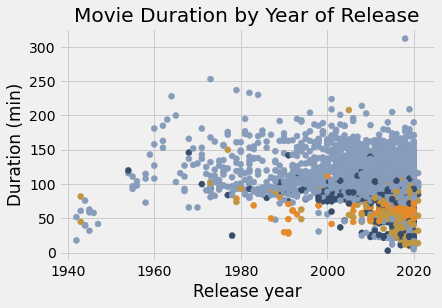

In [13]:
# Assign colors to each genre
genre_color = {
    "Children": "#384c6b",      # orangeish
    "Documentaries": "#c09741", # goldish
    "Stand-Up": "#e38a2b",      # darkblueish
}

# Loop through each movies and assign a color based on its genre
colors = []
for i, row in netflix_movies.iterrows():
    # If not in genre_colors, then it is "others" with lightblueish color
    colors.append(genre_color.get(row["genre"], "#879bbb"))


# Plot each movies by its duration, release date, and genre
fig = plt.figure()
plt.scatter(netflix_movies["release_year"].values, netflix_movies["duration"].values, c=colors)

# Add labels to the plot
plt.xlabel("Release year") 
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")

# Apply a default style
plt.style.use("fivethirtyeight")

# Show the plot
plt.show()

In [14]:
# Answer on the question, "Are we certain that movies are getting shorter?"
answer = "no"